#  <c>Program for displaying points inside the rectange and its vincity</c>

In [1]:
import pandas as pd 
import random
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches


## Point cloud

In [2]:
file = r"C:\Users\Sandeep\Documents\Python Project (3D point Cloud)\Python Project (3D point Cloud)\dataset.csv"
readfile = pd.read_csv(file)

In [3]:
xcol = readfile.X
ycol = readfile.Y
countno = ycol.size

In [4]:
#point cloud coordinates
points = [((xcol[i]),(ycol[i])) for i in range(countno)]
pts = np.array(points)

In [5]:
# finding range to give a user to create a rectangle
minXcord= (min(xcol))
maxXcord= (max(xcol))
minYcord= (min(ycol))
maxYcord= (max(ycol))

#suggesting range for coordinates to user
print("Enter the cordinates of the rectangle")
print("For x cordinate, enter any value between " + str(round(minXcord, 2)) + ' and ' + str(round(maxXcord, 2)))
print("For y cordinate, enter any value between " + str(round(minYcord, 2)) + ' and ' + str(round(maxYcord, 2)))

Enter the cordinates of the rectangle
For x cordinate, enter any value between -32.83 and 88.69
For y cordinate, enter any value between -0.22 and 75.36


## Ask for co ordinates for the rectangle 

In [6]:
# i didnt added checks that the entered values are within bound for now as i am working on the graphical interface. so just testing within .1 to .9

numx1 = input('x1 lower cordinate: ')
numx2 = input('x2 upper cordinate: ')
numy1 = input('y1 lower cordinate: ')
numy2 = input('y2 upper cordinate: ')
numx1, numx2 = sorted([float(numx1), float(numx2)])
numy1, numy2 = sorted([float(numx1), float(numy2)])

x1 lower cordinate: 30
x2 upper cordinate: 50
y1 lower cordinate: 50
y2 upper cordinate: 70


## Calculate no. of Cordinates inside Rectange

In [7]:
ll = np.array([numx1, numy1])  # lower left cordinate of rectangel
ur = np.array([numx2, numy2]) # upper right cordinate of rectangel
inidx = np.all(np.logical_and(ll <= pts, pts <= ur), axis=1)
inbox = pts[inidx] #points inside rectangle
outbox = pts[np.logical_not(inidx)] # points outside the rectangle


## Calculate threshhold

In [8]:
#threshhold = input('Threshhold :  ')
threshhold = 10  #default taken .2, can take any other value too

# .2 means it will show all  the cordinates which are .2 metrics closer to the border of the rectangle
thnumx1 = numx1 - threshhold
thnumx2 = numx2 + threshhold
thnumy1 = numy1 - threshhold
thnumy2 = numy2 + threshhold

tll = np.array([thnumx1, thnumy1])  # lower left cordinate of rectangel
tur = np.array([thnumx2, thnumy2]) # upper right cordinate of rectangel
var1 = np.all(np.logical_and(tll <= outbox, outbox <= tur), axis=1)
nearbypoints = outbox[var1] # points near the borders of rectangle

## Plotting points and drawing rectangle

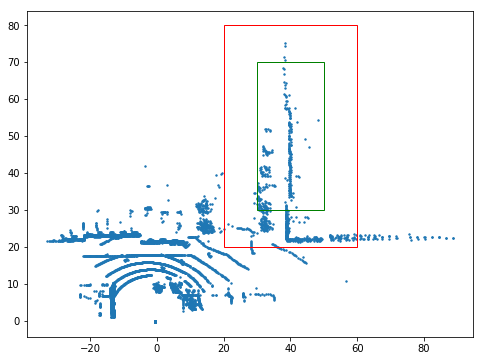

total no. of points = 6338
total no. of points inside rectangle = 327
total no. of nearby/threshhold points = 466
------------------
Points inside rectangle
[[37.77186368 68.42361302]
 [38.24862626 68.15825037]
 [38.13755925 66.88938273]
 [38.17244483 64.75225512]
 [38.57298924 64.47630359]
 [38.2872873  63.89744626]
 [38.4200701  63.14025354]
 [37.96407884 61.42111575]
 [32.40123085 52.03450873]
 [38.46753339 61.29873368]
 [32.85124556 51.94545695]
 [32.58191601 51.45991919]
 [38.74170643 60.88262148]
 [38.58305813 60.53995022]
 [33.33354329 51.92232977]
 [39.46828736 61.07878378]
 [38.60179316 59.66928737]
 [33.78465225 51.82555191]
 [39.07085819 59.5702852 ]
 [38.63983478 58.82352663]
 [33.95148438 51.31455428]
 [38.43374924 57.71622528]
 [38.45638705 57.68472788]
 [38.42959892 58.59257447]
 [31.81872638 47.36911694]
 [31.76699607 47.23864981]
 [38.91300822 57.58245019]
 [38.84516849 57.39564955]
 [31.98067786 46.91709189]
 [31.88032639 46.69978562]
 [39.58303791 57.70148588]
 [39.4

In [10]:
figure1 = plt.figure(figsize=(8,6))
ax = figure1.add_subplot(111)

#Create a Rectangle patch
#Rectangle(xy, width, height, angle=0.0, **kwargs)
#rect cordinates a,b,c,d
# a =numx1,numy1    b =numx2,numy1    c =numx2,numy2   d = numx1,numy2

width1  = float(numx2)-float(numx1)
height1 = float(numy2)-float(numy1)

width2  = float(thnumx2)-float(thnumx1)
height2 = float(thnumy2)-float(thnumy1)


rect1 = patches.Rectangle((numx1,numy1),width1,height1,linewidth=1,edgecolor='g',facecolor='none')
# drew 2nd rectangle just for reference. we can comment the recangle like, still it will show all the nearby points
rect2 = patches.Rectangle((thnumx1,thnumy1),width2,height2,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)

plt.scatter(xcol,ycol,s=2)
plt.show()


print('total no. of points = ' + str(len(pts)))
print('total no. of points inside rectangle = ' + str(len(inbox)))
print('total no. of nearby/threshhold points = ' +str(len(nearbypoints)))
print('------------------')
print('Points inside rectangle')
print(inbox)
print('------------------')
print('Nearby points')
print(nearbypoints)